In [19]:
from IPython.display import display, Markdown
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Occupancy Detection Dataset

In [2]:
# Load in the dataset
train = pd.read_csv('/home/yungshun/workspace/py3/sklearn-occupancy-detection-time-series-forecasting/datasets/datatraining.txt')
test1 = pd.read_csv('/home/yungshun/workspace/py3/sklearn-occupancy-detection-time-series-forecasting/datasets/datatest.txt')
test2 = pd.read_csv('/home/yungshun/workspace/py3/sklearn-occupancy-detection-time-series-forecasting/datasets/datatest2.txt')

## Feature understanding

### head(), describe(), info(), infer_dtype()

1. `pandas.DataFrame.head(n=5)` - this function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.


2. `pandas.DataFrame.describe()` - generates descriptive statistics.
  * For <b>numeric data</b>, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median. 
  * For <b>object data</b> (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. Timestamps also include the first and last items.<br/>


3. `pandas.DataFrame.info()` - this method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Used to check if missing data exists and get the shape. This method returns None.


4. `pandas.api.types.infer_dtype()` - efficiently infer the type of a passed val, or list-like array of values. Return a string describing the type. Used to check what type a column really is for seeing if we need to apply to_date() to this column later.  

In [3]:
def report(df):
    display(Markdown('<b>head():</b>'))
    display(df.head())
    display(Markdown('<b>describe():</b>'))
    display(df.describe())
    display(Markdown('<b>info():</b>'))
    display(df.info(verbose=True))
    display(Markdown('<b>infer_dtype():</b>'))
    display(df.apply(lambda x: pd.api.types.infer_dtype(x.values)))

In [4]:
report(train)

<b>head():</b>

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


<b>describe():</b>

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


<b>info():</b>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


None

<b>infer_dtype():</b>

date               string
Temperature      floating
Humidity         floating
Light            floating
CO2              floating
HumidityRatio    floating
Occupancy         integer
dtype: object

In [5]:
report(test1)

<b>head():</b>

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


<b>describe():</b>

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


<b>info():</b>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
date             2665 non-null object
Temperature      2665 non-null float64
Humidity         2665 non-null float64
Light            2665 non-null float64
CO2              2665 non-null float64
HumidityRatio    2665 non-null float64
Occupancy        2665 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


None

<b>infer_dtype():</b>

date               string
Temperature      floating
Humidity         floating
Light            floating
CO2              floating
HumidityRatio    floating
Occupancy         integer
dtype: object

In [6]:
report(test2)

<b>head():</b>

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


<b>describe():</b>

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


<b>info():</b>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
date             9752 non-null object
Temperature      9752 non-null float64
Humidity         9752 non-null float64
Light            9752 non-null float64
CO2              9752 non-null float64
HumidityRatio    9752 non-null float64
Occupancy        9752 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


None

<b>infer_dtype():</b>

date               string
Temperature      floating
Humidity         floating
Light            floating
CO2              floating
HumidityRatio    floating
Occupancy         integer
dtype: object

There aren't any null values in the sets. No need for imputing.

### rename()

Rename columns if you want.

In [7]:
train = train.rename(columns={'date': 'Date'})
test1 = test1.rename(columns={'date': 'Date'})
test2 = test2.rename(columns={'date': 'Date'})

### to_datetime()

Change string dates to Python datetime object.

In [9]:
train.Date = pd.to_datetime(train.Date)
test1.Date = pd.to_datetime(test1.Date)
test2.Date = pd.to_datetime(test2.Date)

In [11]:
display(train.apply(lambda x: pd.api.types.infer_dtype(x.values)))
display(test1.apply(lambda x: pd.api.types.infer_dtype(x.values)))
display(test2.apply(lambda x: pd.api.types.infer_dtype(x.values)))

Date             datetime
Temperature      floating
Humidity         floating
Light            floating
CO2              floating
HumidityRatio    floating
Occupancy         integer
dtype: object

Date             datetime
Temperature      floating
Humidity         floating
Light            floating
CO2              floating
HumidityRatio    floating
Occupancy         integer
dtype: object

Date             datetime
Temperature      floating
Humidity         floating
Light            floating
CO2              floating
HumidityRatio    floating
Occupancy         integer
dtype: object

Perform some data visualizations for get clear understanding of the dataset.

### scatter_matrix()

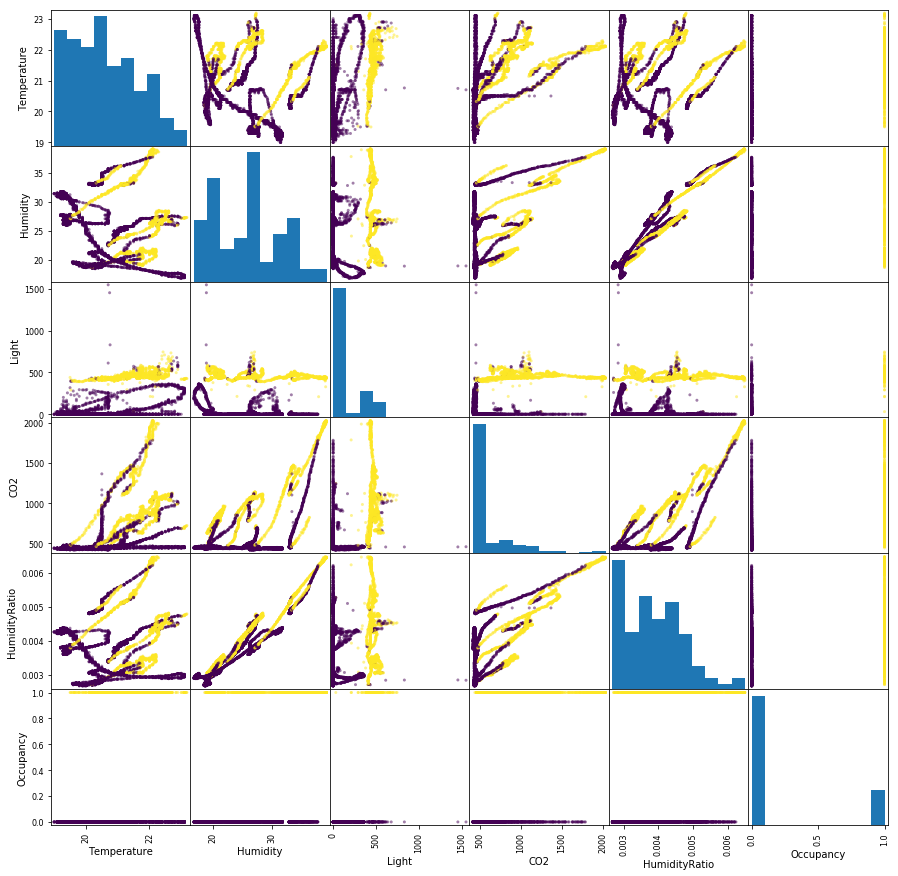

In [12]:
pd.plotting.scatter_matrix(train, c=train['Occupancy'], figsize=[15, 15])
plt.show()

What I conclude from this scenery is that I need light. Humidity ratio and humidity are highly correlated. Also CO2 and humidity ratio together are useless. Temperature with CO2 nor humidity (nor humidity ratio) too do not do well. It seems that light with anything will handle the situation. 

### Plot every feature in time series

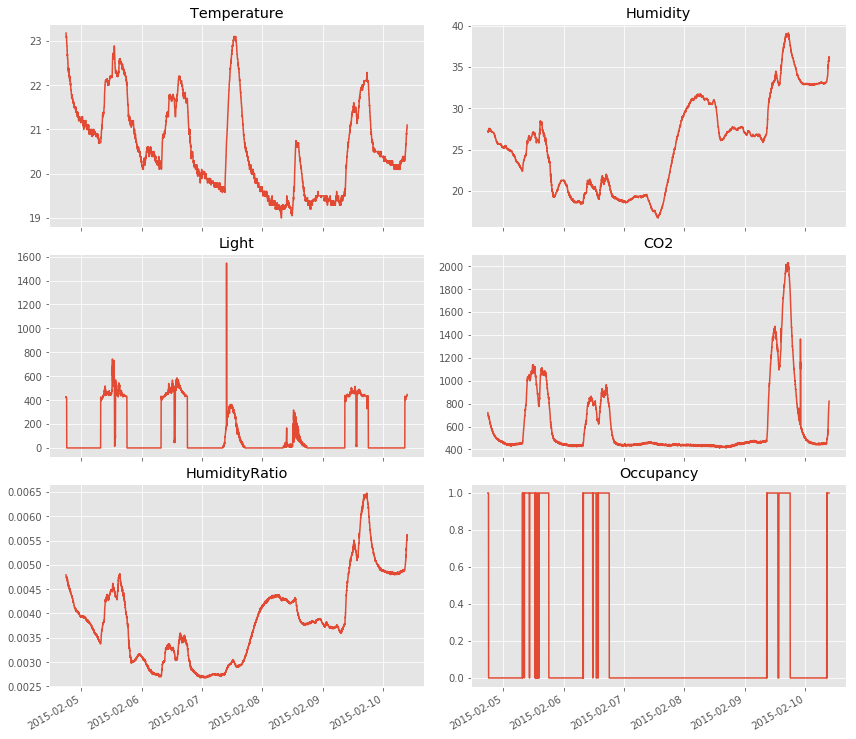

In [42]:
plt.style.use('ggplot')

for i, col in enumerate(train.columns.values[1:]):
    plt.subplot(3, 2, i+1)
    plt.plot(train['Date'].values, train[col].values, label=col)
    plt.title(col)
    plt.tight_layout()
    plt.grid(True)
    
    fig, ax = plt.gcf(), plt.gca()
    ax.xaxis_date()
    fig.autofmt_xdate()
    fig.set_size_inches(12, 12)
    
plt.show()

A wide gap between 07-09.02.2015. I wonder if those days are weekend.

### Analyze features

According to the above two plots, We'll analyze the `Occupany`, `Light`, and `CO2` columns in the following.

In [69]:
# Occupancy

In [20]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
seventh_of_feb = datetime.strptime('2015-02-07', '%Y-%m-%d')
print(days[seventh_of_feb.weekday()])

Saturday


Just as I thought. The officers didn't visit their place on weekends. It would be very good if we had the working hours.

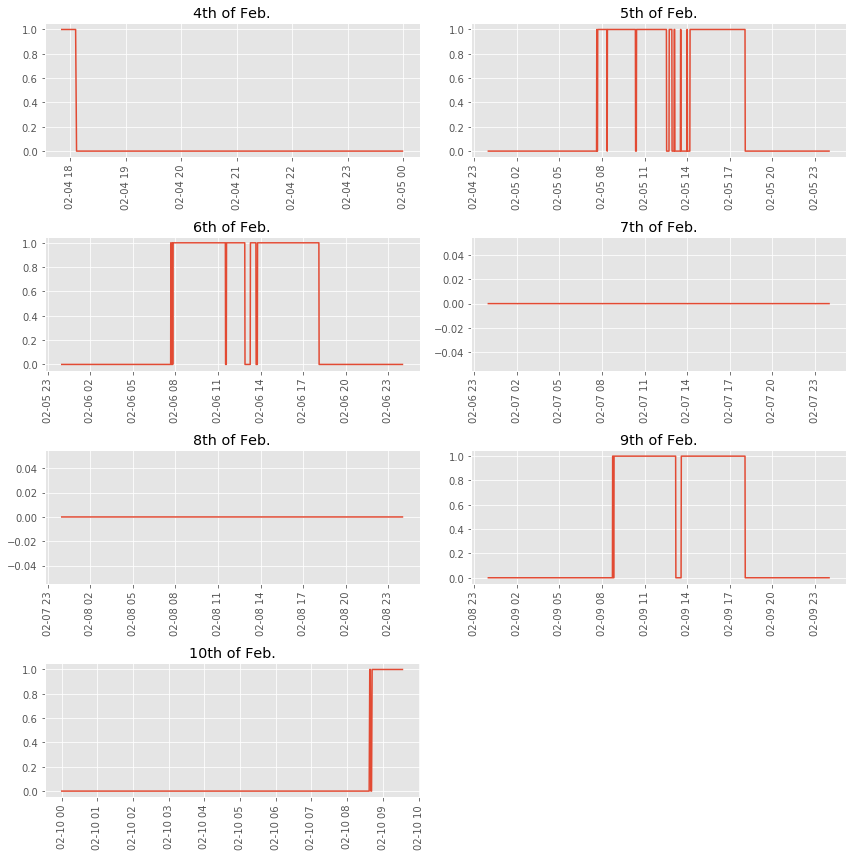

In [51]:
for i in range(train['Date'].min().day, train['Date'].max().day + 1):
    plt_idx = i - train['Date'].min().day
    plt.subplot(4, 2, plt_idx+1)    
    plt.plot(train.loc[lambda df: df['Date'].dt.day == i, ['Date']].values,
             train.loc[lambda df: df['Date'].dt.day == i, ['Occupancy']].values)    
    plt.title(str(i) + 'th of Feb.')
    plt.grid(True)
    plt.xticks(rotation=90)
    
    fig, ax = plt.gcf(), plt.gca()
    ax.xaxis_date()   
    fig.set_size_inches(12, 12)
    fig.tight_layout()

plt.show()

Rougly speaking, the working hours may be between 8am and 6pm. Also there seems to be a lunch break around 1pm. Let's print every first and last occurrence of occupancy in every day.

In [67]:
for i in range(train['Date'].min().day, train['Date'].max().day + 1):
    try:
        print('Start:\t', train.loc[(train['Date'].dt.day == i) & (train['Occupancy'] == 1), ['Date']].iloc[0])
        print('End:\t', train.loc[(train['Date'].dt.day == i) & (train['Occupancy'] == 1), ['Date']].iloc[-1])
    except:
        print('No Occupancy')

Start:	 Date   2015-02-04 17:51:00
Name: 1, dtype: datetime64[ns]
End:	 Date   2015-02-04 18:06:00
Name: 16, dtype: datetime64[ns]
Start:	 Date   2015-02-05 07:38:00
Name: 828, dtype: datetime64[ns]
End:	 Date   2015-02-05 18:04:00
Name: 1454, dtype: datetime64[ns]
Start:	 Date   2015-02-06 07:40:59
Name: 2271, dtype: datetime64[ns]
End:	 Date   2015-02-06 18:06:00
Name: 2896, dtype: datetime64[ns]
No Occupancy
No Occupancy
Start:	 Date   2015-02-09 08:44:59
Name: 6655, dtype: datetime64[ns]
End:	 Date   2015-02-09 18:04:00
Name: 7214, dtype: datetime64[ns]
Start:	 Date   2015-02-10 08:38:00
Name: 8088, dtype: datetime64[ns]
End:	 Date   2015-02-10 09:33:00
Name: 8143, dtype: datetime64[ns]


It appears to be that officers do not come to office before 07:30 and they depart after 18:00.

In [ ]:
# Light

Light seems to be less than 400lx at the weekend. Day light must be illuminating the room atmost 370lx or so. Light follows the same pattern with occupancy. Interesting enough, there is a sudden increase in the lighting at the weekend, possibly on 7th of Feb. Those spots may be <b>outliers</b>.

In [68]:
light_outliers = train.loc[(train['Date'].dt.day == 7) & (train['Light'] > 850), ['Date', 'Light']]
light_outliers

,Date,Light
3832,2015-02-07 09:42:00,1546.333333
3833,2015-02-07 09:42:59,1451.750000


In [71]:
# CO2

CO2 data seems to be very useful, since it also follows occupancy pattern just as light does. Fluctuations can be seen when there is an occupant in the office.

## Feature construction

After exploratory analyses, I decided to add `Weekend` and `WorkingHours` as features.

In [90]:
def add_weekend_workinghours_features(df):
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['Weekend'] = np.where((df['Date'].dt.weekday == days.index('Saturday')) | (df['Date'].dt.weekday == days.index('Sunday')), 1, 0)
    df['WorkingHours'] = np.where((df['Date'].dt.time >= datetime.strptime('07:30', '%H:%M').time()) & (df['Date'].dt.time <= datetime.strptime('18:00', '%H:%M').time()), 1, 0)

In [92]:
add_weekend_workinghours_features(train)
add_weekend_workinghours_features(test1)
add_weekend_workinghours_features(test2)

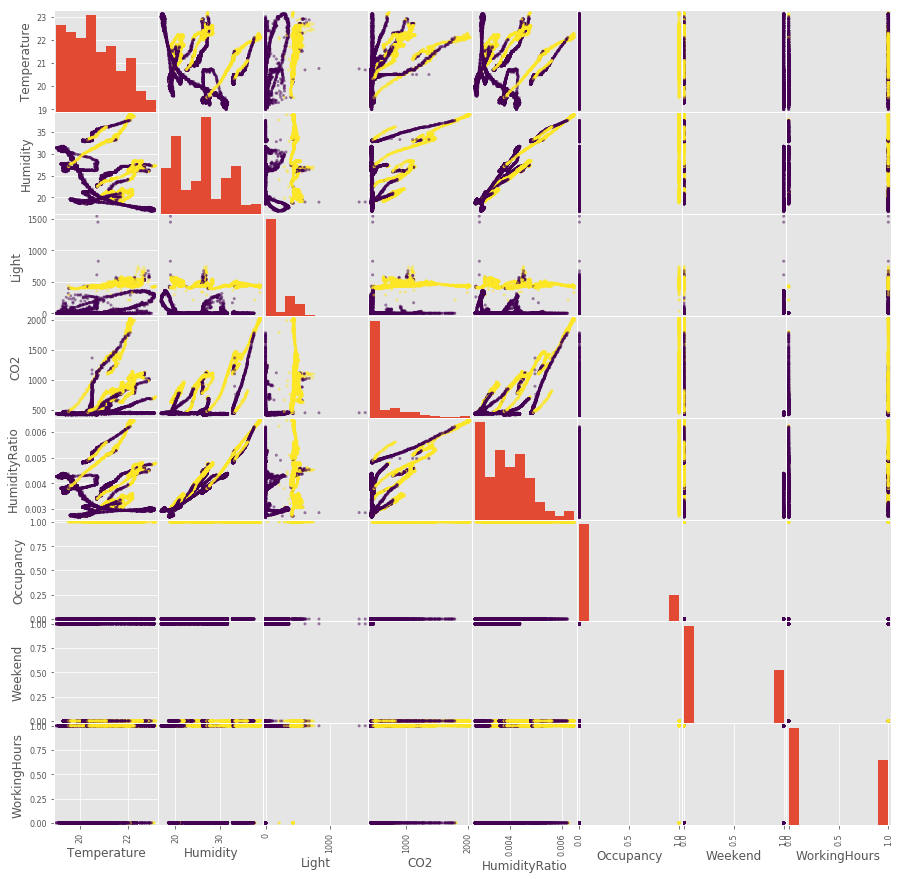

In [93]:
pd.plotting.scatter_matrix(train, c=train['Occupancy'], figsize=[15, 15])
plt.show()

As a result, I think Weekend clearly distinguishes the Occupancy. So does the WorkingHours.

##